In [32]:
from google.colab import files
uploaded = files.upload()

Saving HeartDisease.csv to HeartDisease (1).csv


In [33]:
import pandas as pd

df3= pd.read_csv("HeartDisease.csv")
df3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [34]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             302 non-null    int64  
 1   sex             302 non-null    int64  
 2   cp              302 non-null    int64  
 3   trestbps        302 non-null    int64  
 4   chol            302 non-null    int64  
 5   fbs             302 non-null    int64  
 6   restecg         302 non-null    int64  
 7   thalach         302 non-null    int64  
 8   exang           302 non-null    int64  
 9   oldpeak         302 non-null    float64
 10  slop            302 non-null    int64  
 11  ca              302 non-null    object 
 12  thal            302 non-null    object 
 13  pred_attribute  302 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.2+ KB


In [35]:
df3.rename(columns = {'pred_attribute':'Target'}, inplace = True)
df3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,Target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

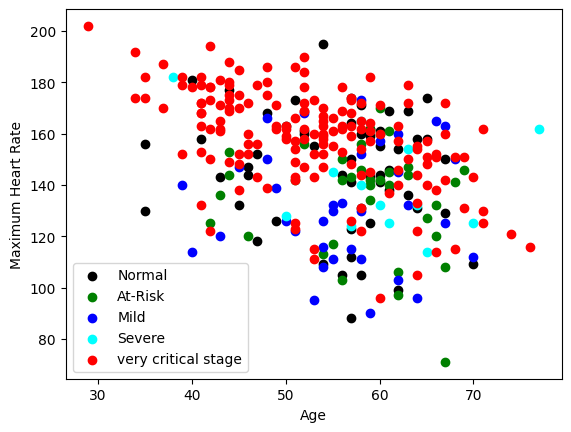

In [37]:
plt.scatter(x=df3.age[df3.Target==1], y=df3.thalach[(df3.Target==1)], c="black")
plt.scatter(x=df3.age[df3.Target==2], y=df3.thalach[(df3.Target==2)], c="green")
plt.scatter(x=df3.age[df3.Target==3], y=df3.thalach[(df3.Target==3)], c="blue")
plt.scatter(x=df3.age[df3.Target==4], y=df3.thalach[(df3.Target==4)], c="cyan")
plt.scatter(x=df3.age[df3.Target==0], y=df3.thalach[(df3.Target==0)],c="red")
plt.legend(["Normal","At-Risk","Mild", "Severe","very critical stage"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [38]:
df3['Target'].value_counts()

Target
0    163
1     55
2     36
3     35
4     13
Name: count, dtype: int64

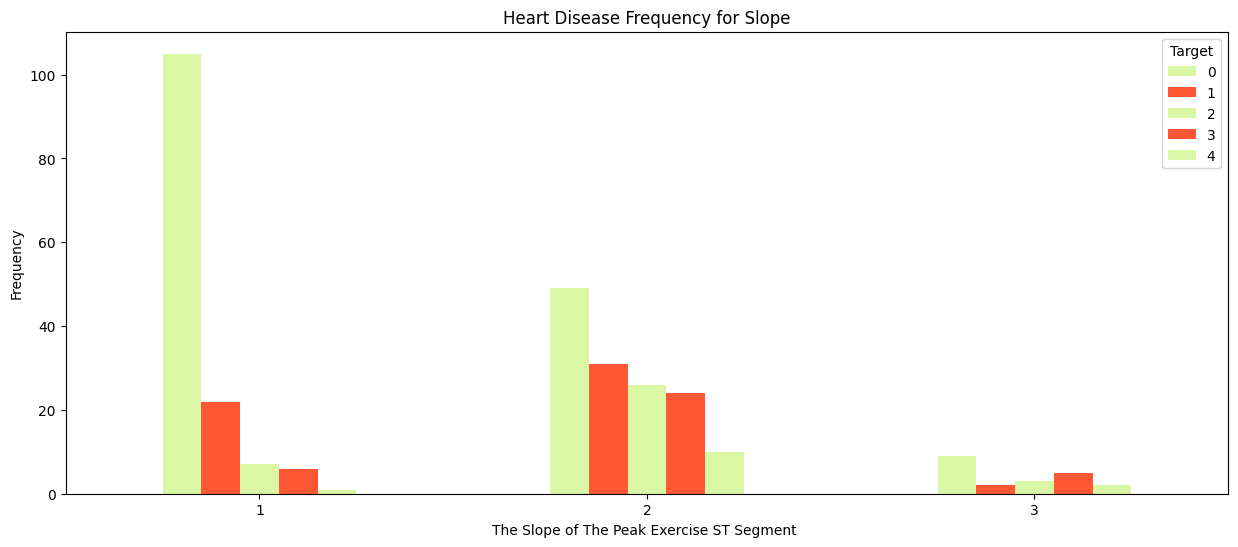

In [39]:
pd.crosstab(df3.slop,df3.Target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

In [40]:
df3.isnull().values.any()

False

In [42]:
# Replace '?' with 1
df3.replace('?', 1, inplace=True)

In [43]:
# Convert object columns to int
for col in df3.select_dtypes(include='object').columns:
    df3[col] = df3[col].astype(int)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slop      302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  Target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [44]:
# Splitting the dataset into training and testing sets.
x = df3.iloc[:, :-2]
y = df3.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.35)

In [45]:
# Using standard scaler as a standardization technique.
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [48]:
# Creating KNN Model.
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 9, p = 2, metric = 'euclidean')
KNN.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [49]:
KNN_ypred = KNN.predict(x_test)
KNN_ypred

array([0, 0, 0, 1, 0, 0, 1, 0, 3, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 2, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0,
       2, 1, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 3,
       1, 3, 0, 1, 0, 0, 0, 0, 3, 0, 0, 2, 1, 0, 0, 0, 2, 0])

In [52]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,KNN_ypred))

0.5283018867924528


In [ ]:
from sklearn.metrics import f1_score

In [54]:
from sklearn.metrics import confusion_matrix
cm1= confusion_matrix(y_test,KNN_ypred)
print(cm1)

[[50  3  0  0  0]
 [16  3  3  2  0]
 [ 8  2  2  2  0]
 [ 3  2  5  1  0]
 [ 1  1  2  0  0]]


<Axes: >

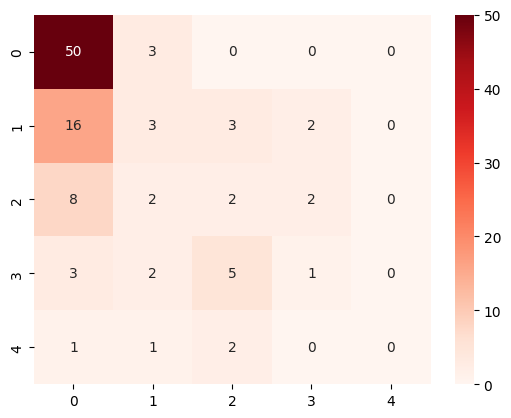

In [55]:
import seaborn as sns
sns.heatmap(cm1,annot=True,cmap="Reds")

In [58]:
import warnings
warnings.filterwarnings('ignore')

In [59]:
from sklearn.metrics import classification_report
target_names = ["Normal","At-Risk","Mild", "Severe","very critical stage"]
print(classification_report(y_test, KNN_ypred, target_names=target_names))

                     precision    recall  f1-score   support

             Normal       0.64      0.94      0.76        53
            At-Risk       0.27      0.12      0.17        24
               Mild       0.17      0.14      0.15        14
             Severe       0.20      0.09      0.13        11
very critical stage       0.00      0.00      0.00         4

           accuracy                           0.53       106
          macro avg       0.26      0.26      0.24       106
       weighted avg       0.43      0.53      0.45       106



# **Now SVM**

In [61]:
from sklearn.svm import SVC
SVM=SVC(kernel="linear",random_state=0)
SVM.fit(x_train,y_train)
SVM.score(x_train,y_train)

0.6938775510204082

In [67]:
SVM_ypred=SVM.predict(x_test)
SVM_ypred

array([0, 2, 1, 1, 0, 1, 1, 1, 3, 0, 3, 0, 2, 0, 0, 0, 4, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 3, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 1, 0, 0,
       3, 1, 3, 0, 0, 0, 0, 3, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 3,
       1, 3, 0, 1, 0, 0, 0, 0, 1, 0, 1, 3, 1, 1, 0, 0, 3, 0])

In [68]:
print("Accuracy of SVM=",accuracy_score(y_test,SVM_ypred))
cm2= confusion_matrix(y_test,SVM_ypred)
print(cm2)

Accuracy of SVM= 0.5849056603773585
[[48  2  3  0  0]
 [13  7  0  4  0]
 [ 6  3  2  3  0]
 [ 2  3  0  5  1]
 [ 1  1  1  1  0]]


<Axes: >

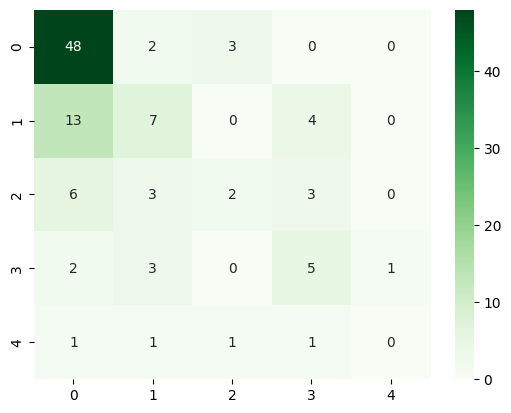

In [69]:
sns.heatmap(cm2,annot=True,cmap="Greens")

In [70]:
target_names = ["Normal","At-Risk","Mild", "Severe","very critical stage"]
print(classification_report(y_test, SVM_ypred, target_names=target_names))

                     precision    recall  f1-score   support

             Normal       0.69      0.91      0.78        53
            At-Risk       0.44      0.29      0.35        24
               Mild       0.33      0.14      0.20        14
             Severe       0.38      0.45      0.42        11
very critical stage       0.00      0.00      0.00         4

           accuracy                           0.58       106
          macro avg       0.37      0.36      0.35       106
       weighted avg       0.53      0.58      0.54       106

